# MR Perfusion Source Mapping Depicts Venous Territories and Reveals Perfusion Modulation during Neural Activation

This notebook reproduces the figures and processing from the manuscript "MR Perfusion Source Mapping Depicts Venous Territories and Reveals Perfusion Modulation during Neural Activation"

Author of demo: Ekin Karasan, ekin_karasan@berkeley.edu

## Install necessary packages

In [1]:
import numpy as np
import sigpy as sp
import matplotlib.pyplot as plt
import math
import nibabel as nib
import libs 
import cv2 as cv
from PIL import Image as im
import matplotlib.colors as mcolors

%matplotlib inline

## Figure 3

### Download the necessary data

In [2]:
data = np.load("dataset/Figure3/figure3_dataset.npy")

Data dimensions: [# of phase cycles, # of displacement encodings, # of mixing times, # of coils, Nx, Ny]

### Data Processing

In [3]:
# Echo seperation 
kspDconj, kspT1, kspD=libs.DiSpect_SepEcho(data)

# Reshape Displacement Echo
kspD=np.reshape(kspD,(22,14,19,15,40,40))

# Compute Displacement Spectrum (Perfusion Source Maps)
spectrum = sp.rss(np.fft.ifftshift(np.fft.ifft(np.fft.ifft(np.squeeze(kspD),axis=1),axis=0),0),3)

### Load QSM Venogram

In [4]:
qsm = nib.load("dataset/Figure3/figure3_qsm.nii").get_fdata()

### Plot Perfusion Source Maps

#### Plot Section 1

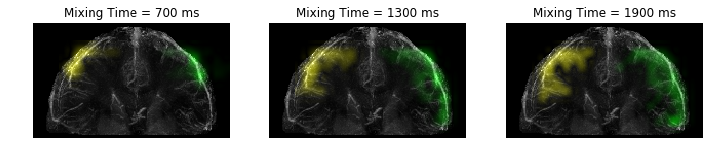

In [5]:
# Source perfusion maps of two selected veins
s1 = spectrum[5:,2:,:,12,15] + spectrum[5:,2:,:,13,15] #cropped to fit in QSM-venogram
s2 = spectrum[:,2:,:,15,27]

# Coronal projection of qsm venogram
img =np.transpose(np.flip(np.flip(np.max(qsm[:,140:180,:],1),0),1))
imgc = np.zeros((130,224,3))
imgc[:,:,0] = 255*np.abs(img)/np.max(np.abs(img))
imgc[:,:,1] = 255*np.abs(img)/np.max(np.abs(img))
imgc[:,:,2] = 255*np.abs(img)/np.max(np.abs(img))

# Resize and offsets
resize_factor = (7.5, 7.5)
offset = (35,40)
offset2 = (35,55)

# Plot at three mixing times
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i in range(3):
    # Resize, threshold and denoise spectra
    resized1=libs.ProcessSpectra(s1[:,:,4*i+4], 1.4, resize_factor)
    resized2=libs.ProcessSpectra(s2[:,:,4*i+4], 1.2, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(imgc.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "yellow")
    overlayed = libs.OverlayColor(overlayed, resized2, offset2, "green")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.5,0)
    axes[i].imshow(new_img[18:140,15:207,:])
    title_subplt = "Mixing Time = " + str(100+150*(4*i+4)) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')

#### Plot Section 2

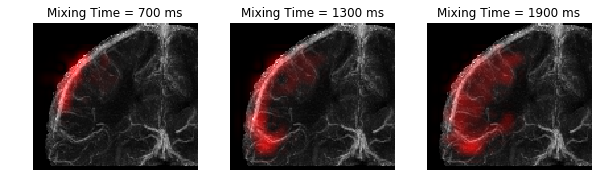

In [6]:
s1 = spectrum[2:,2:,:,25,13] + spectrum[2:,2:,:,26,13]

img =np.transpose(np.flip(np.flip(np.max(qsm[:,90:140,:],1),0),1))
imgc = np.zeros((130,224,3))
imgc[:,:,0] = 255*np.abs(img)/np.max(np.abs(img))
imgc[:,:,1] = 255*np.abs(img)/np.max(np.abs(img))
imgc[:,:,2] = 255*np.abs(img)/np.max(np.abs(img))

# Resize and offsets
resize_factor = (7.5, 7.5)
offset = (35,5)

# Plot at three mixing times
fig, axes = plt.subplots(1, 3, figsize=(10,4))
for i in range(3):
    # Resize, threshold and denoise spectra
    resized1=libs.ProcessSpectra(s1[:,:,4*i+4], 1.1, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(imgc.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "red")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.7,0)
    axes[i].imshow(new_img[18:140,15:140,:])
    title_subplt = "Mixing Time = " + str(100+150*(4*i+4)) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')

#### Plot Section 3

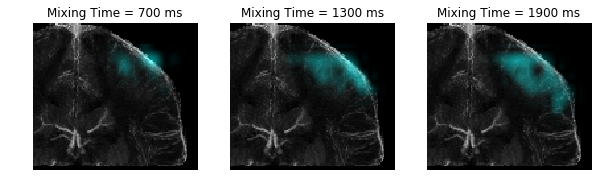

In [7]:
s1 = spectrum[5:-3,2:,:,19,28]+spectrum[5:-3,2:,:,20,28] 
img =np.transpose(np.flip(np.flip(np.max(qsm[:,110:140,:],1),0),1))
imgc = np.zeros((130,224,3))
imgc[:,:,0] = 255*np.abs(img)/np.max(np.abs(img))
imgc[:,:,1] = 255*np.abs(img)/np.max(np.abs(img))
imgc[:,:,2] = 255*np.abs(img)/np.max(np.abs(img))

resize_factor = (7.5,7.5)
offset = (35,95)
fig, axes = plt.subplots(1, 3, figsize=(10,4))
for i in range(3):
    # Resize, threshold and denoise spectra
    resized1=libs.ProcessSpectra(s1[:,:,4*i+4], 1.3, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(imgc.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "blue")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))
    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.5,0)
    axes[i].imshow(new_img[18:140,82:207,:])
    title_subplt = "Mixing Time = " + str(100+150*(4*i+4)) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')


## Figure 4

### Download the necessary data

In [8]:
data_ROI1 = np.load("dataset/Figure4/figure4_ROI1_dataset.npy")
data_ROI2 = np.load("dataset/Figure4/figure4_ROI2_dataset.npy")

QSM_ROI1 = np.load("dataset/Figure4/figure4_ROI1_QSM.npy")
QSM_ROI2 = np.load("dataset/Figure4/figure4_ROI2_QSM.npy")

colors = np.load("dataset/Figure4/colormap.npy")

### Plot Perfusion Source Maps

#### Plot Section 1

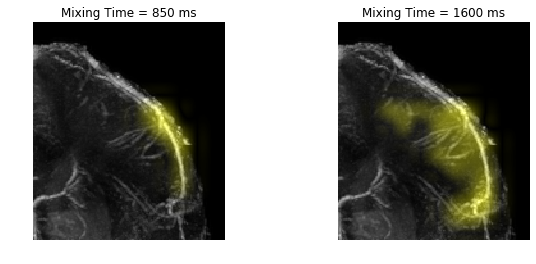

In [9]:
s1 = data_ROI1[:,:,:,0] + data_ROI1[:,:,:,1]

# Resize and offsets
resize_factor = (6/0.4688,6/0.5)
offset = (69,188)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i in range(2):
    # Resize, threshold and denoise spectra
    thresh = 0.25/np.exp(-((5*i+3)*150+550)/3500)
    resized1=libs.ProcessSpectra_comp(s1[:,:,(5*i+5)], s1[:,:,(5*i+5)], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(QSM_ROI1.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "yellow")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(QSM_ROI1.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.5,0)
    axes[i].imshow(new_img[30:200,270:420])
    title_subplt = "Mixing Time = " + str(100+150*(5*i+5)) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')

#### Plot Section 2

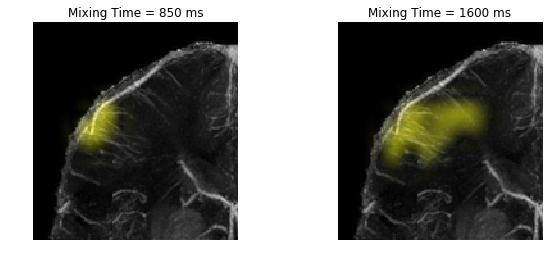

In [10]:
s1 = data_ROI2[:,:,:,0] + data_ROI2[:,:,:,1]

# Resize and offsets
resize_factor = (6/0.4688,6/0.5)
offset = (69,71)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i in range(2):
    # Resize, threshold and denoise spectra
    thresh = 0.25/np.exp(-((5*i+3)*150+550)/3500)
    resized1=libs.ProcessSpectra_comp(s1[:,:,(5*i+5)],s1[:,:,(5*i+5)], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(QSM_ROI2.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "yellow")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(QSM_ROI2.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.5,0)
    axes[i].imshow(new_img[30:200,110:270])
    title_subplt = "Mixing Time = " + str(100+150*(5*i+5)) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')

### Plot ROIs

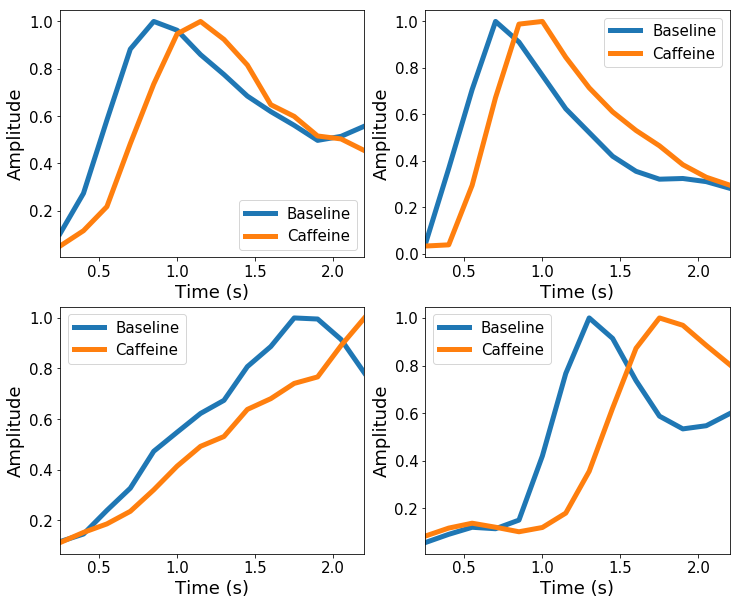

In [11]:
rois = [2, 2, 1, 1]
sources = [[6,7], [10,9], [15,7], [14,2]]
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for i in range(4):
    if rois[i]==1:
        s1 = data_ROI1[:,:,1:15,0]
        s2 = data_ROI1[:,:,1:15,1]
    else:
        s1 = data_ROI2[:,:,1:15,0]
        s2 = data_ROI2[:,:,1:15,1]
        
    baseline, caffeine, time = libs.Plot_SourceROIs(s1, s2, sources[i])
    axes[i%2,int(i/2)].plot(time,baseline,label='Baseline',linewidth=5)
    axes[i%2,int(i/2)].plot(time,caffeine,label='Caffeine',linewidth=5)
    axes[i%2,int(i/2)].set_xlim([0.25, 2.2])
    axes[i%2,int(i/2)].set_xlabel('Time (s)', fontsize=18)
    axes[i%2,int(i/2)].set_ylabel('Amplitude', fontsize=18)
    axes[i%2,int(i/2)].tick_params(axis='x', labelsize=15)
    axes[i%2,int(i/2)].tick_params(axis='y', labelsize=15)
    axes[i%2,int(i/2)].legend(fontsize=15)

### Estimate Arrival Delay

#### Section 1

(-0.5, 159.5, 169.5, -0.5)

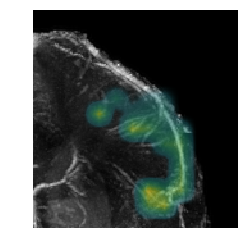

In [12]:
# Data and Parameters
s1 = data_ROI1[:,:,1:15,0]
s2 = data_ROI1[:,:,1:15,1]
imgc = QSM_ROI1.copy()
resize_factor = (6/0.4688,6/0.5)
offset = (69,188)
limit = 400

# Time Delay
tdelay = libs.get_deltat(s1,s2,0.5)


# Treshold and Resize
thresholding_sum = libs.get_thresholding_sum(s1+s2,0.25)
tdelay[thresholding_sum<5]=np.zeros(tdelay[thresholding_sum<5].shape)
resized = cv.resize(np.roll(np.flip(np.flip(np.transpose(tdelay)),1),0,0), dsize=(int(resize_factor[0]*tdelay.shape[0]), int(resize_factor[1]*tdelay.shape[1])), interpolation=cv.INTER_LINEAR)

# Overlay the Delay Map
plt.figure()
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
overlayed = libs.OverlayColor_cmap(resized,imgc,cmap,offset,limit,0)
plt.imshow(imgc[30:200,270:430,0], cmap="gray")
plt.imshow(overlayed[30:200,270:430])
plt.axis('off')

#### Section 2

(-0.5, 159.5, 169.5, -0.5)

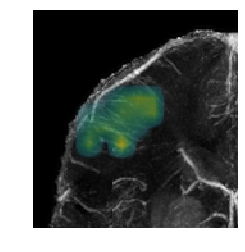

In [13]:
# Data and Parameters
s1 = data_ROI2[:,:,1:15,0]
s2 = data_ROI2[:,:,1:15,1]
imgc = QSM_ROI2.copy()
resize_factor = (6/0.4688,6/0.5)
offset = (69,71)
limit = 400

# Time Delay
tdelay = libs.get_deltat(s1,s2,0.5)


# Treshold and Resize
thresholding_sum = libs.get_thresholding_sum(s1+s2,0.25)
tdelay[thresholding_sum<5]=np.zeros(tdelay[thresholding_sum<5].shape)
resized = cv.resize(np.roll(np.flip(np.flip(np.transpose(tdelay)),1),0,0), dsize=(int(resize_factor[0]*tdelay.shape[0]), int(resize_factor[1]*tdelay.shape[1])), interpolation=cv.INTER_LINEAR)

# Overlay the Delay Map
plt.figure()
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
overlayed = libs.OverlayColor_cmap(resized,imgc,cmap,offset,limit,0)
plt.imshow(imgc[30:200,110:270,0], cmap="gray")
plt.imshow(overlayed[30:200,110:270])
plt.axis('off')

## Figure 5

### Download the necessary data

In [14]:
data = np.load("dataset/Figure5/figure5_spectra.npy")
qsm = nib.load("dataset/Figure5/figure5_qsm.nii").get_fdata()
interpolated_activations = np.load("dataset/Figure5/figure5_interpolatedfmri.npy") # Activations interpolated to size of QSM matrix

In [15]:
spectra_baseline = data[:,:,:,:,:,0]
spectra_task = data[:,:,:,:,:,1]

In [16]:
# Colormap for percentage change maps
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#ffe4e182'),(0.3, '#FF000082'),
                                                                     (0.45, '#FF000000'), 
                                                                     (0.55, '#0000FF00'),
                                                                     (0.7,'#00bfff82'),
                                                                     (1, '#ADD8E682')])

### Plot Perfusion Source Maps and Percentage Change Maps

#### Section 1

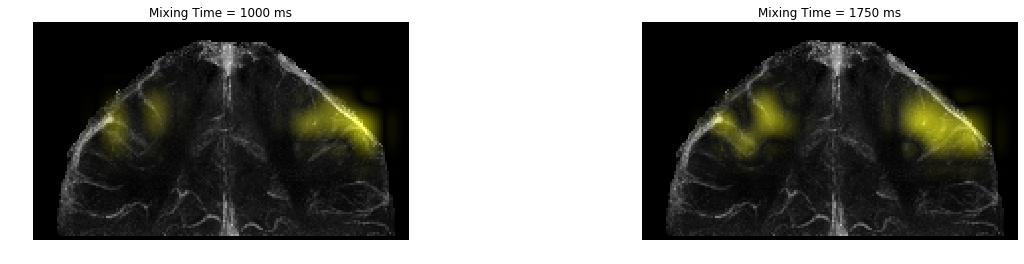

In [17]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = spectra_baseline[:,5:,:,25,13]+spectra_task[:,5:,:,25,13]
s2 = spectra_baseline[:,2:,:,27,27]+spectra_task[:,2:,:,27,27] 

# Coronal projection of qsm venogram
img =np.transpose(np.flip(np.flip(np.max(qsm[:,78:110,:],1),0),1))
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*np.abs(img)/np.abs(np.max(img))
imgc[:,:,1] = 255*np.abs(img)/np.abs(np.max(img))
imgc[:,:,2] = 255*np.abs(img)/np.abs(np.max(img))

# Resize and offsets
resize_factor = (10,10)
offset = (36,22)
offset2 = (36,88)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(20,4))
for i in range(3,9,5):
    # Resize, threshold and denoise spectra
    thresh = 0.33/np.exp(-(i*150+550)/3000) # Second ROI is more noisy
    resized1=libs.ProcessSpectra_comp(s1[:,:,i+3], s1[:,:,i+3], thresh, resize_factor)
    
    thresh = 0.27/np.exp(-(i*150+550)/3000)
    resized2=libs.ProcessSpectra_comp(s2[:,:,i+3], s2[:,:,i+3], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(imgc.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "yellow")
    overlayed = libs.OverlayColor(overlayed, resized2, offset2, "yellow")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.6,0)
    axes[int((i-3)/5)].imshow(new_img[10:,35:225])
    title_subplt = "Mixing Time = " + str(100+150*(i+3)) + " ms"
    axes[int((i-3)/5)].set_title(title_subplt)
    axes[int((i-3)/5)].axis('off')

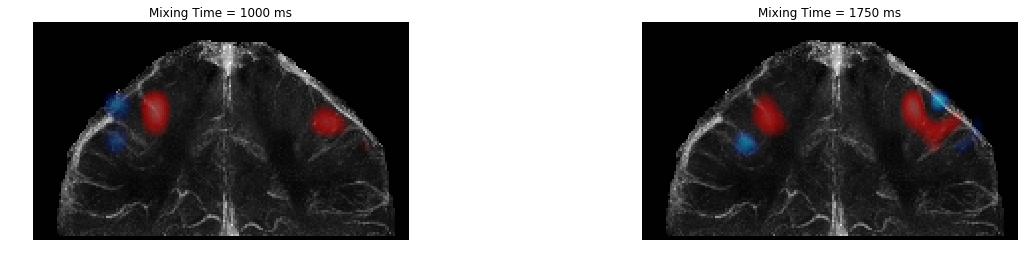

In [18]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = spectra_baseline[:,5:,:,25,13]+spectra_task[:,5:,:,25,13]
s2 = spectra_baseline[:,2:,:,27,27]+spectra_task[:,2:,:,27,27] 

s1_diff = (spectra_baseline[:,5:,:,25,13]-spectra_task[:,5:,:,25,13])/spectra_baseline[:,5:,:,25,13]
s2_diff = (spectra_baseline[:,2:,:,27,27]-spectra_task[:,2:,:,27,27])/spectra_baseline[:,2:,:,27,27]

# Coronal projection of qsm venogram
img =np.transpose(np.flip(np.flip(np.max(qsm[:,78:110,:],1),0),1))
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*np.abs(img)/np.abs(np.max(img))
imgc[:,:,1] = 255*np.abs(img)/np.abs(np.max(img))
imgc[:,:,2] = 255*np.abs(img)/np.abs(np.max(img))

# Resize and offsets
resize_factor = (10,10)
offset = (36,22)
offset2 = (36,88)
limit = 1

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(20,4))
for i in range(3,9,5):
    # Resize, threshold and denoise spectra
    thresh = 0.33/np.exp(-(i*150+550)/3000) # Second ROI is more noisy
    resized1=libs.ProcessSpectra_comp(s1_diff[:,:,i+3], s1[:,:,i+3], thresh, resize_factor)
    
    thresh = 0.27/np.exp(-(i*150+550)/3000) 
    resized2=libs.ProcessSpectra_comp(s2_diff[:,:,i+3], s2[:,:,i+3], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed1 = libs.OverlayColor_cmap(resized1,imgc,cmap,offset,limit,1)
    overlayed2 = libs.OverlayColor_cmap(resized2,imgc,cmap,offset2,limit,1)

    axes[int((i-3)/5)].imshow(img[10:,35:225], cmap="gray")
    axes[int((i-3)/5)].imshow(overlayed1[10:,35:225,:])
    axes[int((i-3)/5)].imshow(overlayed2[10:,35:225,:])
    title_subplt = "Mixing Time = " + str(100+150*(i+3)) + " ms"
    axes[int((i-3)/5)].set_title(title_subplt)
    axes[int((i-3)/5)].axis('off')

#### Section 2

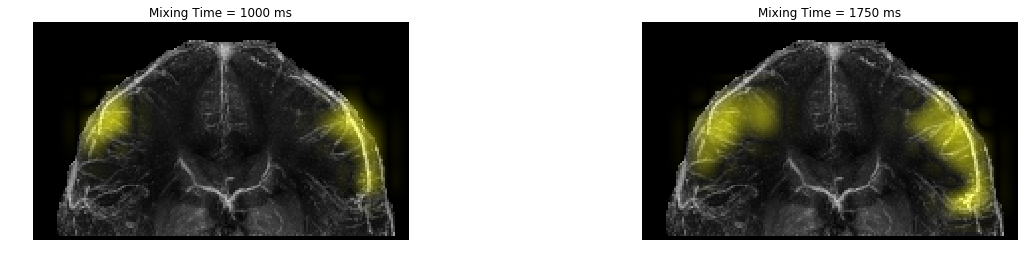

In [19]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = spectra_baseline[:,2:,:,22,13]+spectra_task[:,2:,:,22,13]
s2 = spectra_baseline[:,2:,:,24,28]+spectra_task[:,2:,:,24,28] 

# Coronal projection of qsm venogram
img =np.transpose(np.flip(np.flip(np.max(qsm[:,110:165,:],1),0),1))
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*np.abs(img)/np.abs(np.max(img))
imgc[:,:,1] = 255*np.abs(img)/np.abs(np.max(img))
imgc[:,:,2] = 255*np.abs(img)/np.abs(np.max(img))

# Resize and offsets
resize_factor = (10,10)
offset = (36,22)
offset2 = (36,90)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(20,4))
for i in range(3,9,5):
    # Resize, threshold and denoise spectra
    thresh = 0.27/np.exp(-(i*150+550)/3000) # Second ROI is more noisy
    resized1=libs.ProcessSpectra_comp(s1[:,:,i+3], s1[:,:,i+3], thresh, resize_factor)
    
    thresh = 0.3/np.exp(-(i*150+550)/3000)
    resized2=libs.ProcessSpectra_comp(s2[:,:,i+3], s2[:,:,i+3], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(imgc.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "yellow")
    overlayed = libs.OverlayColor(overlayed, resized2, offset2, "yellow")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.6,0)
    axes[int((i-3)/5)].imshow(new_img[10:,35:225])
    title_subplt = "Mixing Time = " + str(100+150*(i+3)) + " ms"
    axes[int((i-3)/5)].set_title(title_subplt)
    axes[int((i-3)/5)].axis('off')

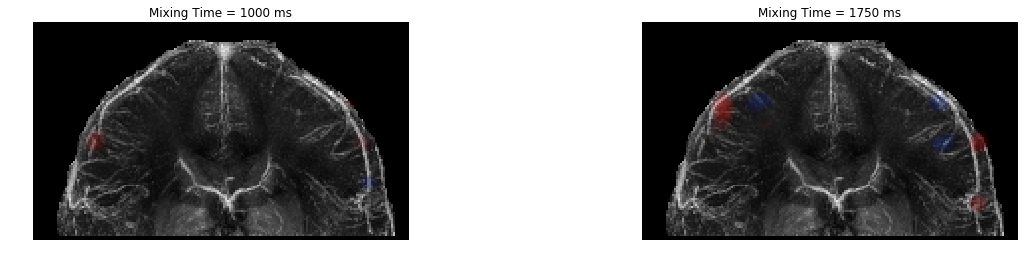

In [20]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = spectra_baseline[:,2:,:,22,13]+spectra_task[:,2:,:,22,13]
s2 = spectra_baseline[:,2:,:,24,28]+spectra_task[:,2:,:,24,28] 

s1_diff = (spectra_baseline[:,2:,:,22,13]-spectra_task[:,2:,:,22,13])/spectra_baseline[:,2:,:,22,13]
s2_diff = (spectra_baseline[:,2:,:,24,28]-spectra_task[:,2:,:,24,28])/spectra_baseline[:,2:,:,24,28]

# Coronal projection of qsm venogram
img =np.transpose(np.flip(np.flip(np.max(qsm[:,110:165,:],1),0),1))

# Resize and offsets
resize_factor = (10,10)
offset = (36,22)
offset2 = (36,90)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(20,4))
for i in range(3,9,5):
    # Resize, threshold and denoise spectra
    thresh = 0.27/np.exp(-(i*150+550)/3000) # Second ROI is more noisy
    resized1=libs.ProcessSpectra_comp(s1_diff[:,:,i+3], s1[:,:,i+3], thresh, resize_factor)
    
    thresh = 0.3/np.exp(-(i*150+550)/3000) 
    resized2=libs.ProcessSpectra_comp(s2_diff[:,:,i+3], s2[:,:,i+3], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed1 = libs.OverlayColor_cmap(resized1,imgc,cmap,offset,limit,1)
    overlayed2 = libs.OverlayColor_cmap(resized2,imgc,cmap,offset2,limit,1)

    axes[int((i-3)/5)].imshow(img[10:,35:225], cmap="gray")
    axes[int((i-3)/5)].imshow(overlayed1[10:,35:225,:])
    axes[int((i-3)/5)].imshow(overlayed2[10:,35:225,:])
    title_subplt = "Mixing Time = " + str(100+150*(i+3)) + " ms"
    axes[int((i-3)/5)].set_title(title_subplt)
    axes[int((i-3)/5)].axis('off')

### Plot Interpolated Activations

#### Section 1

(-0.5, 189.5, 109.5, -0.5)

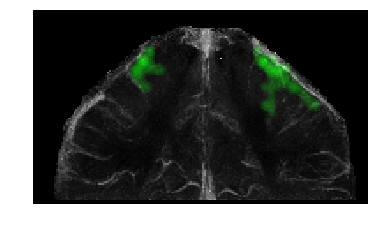

In [21]:
img =np.transpose(np.flip(np.flip(np.max(qsm[:,78:110,:],1),0),1))
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*img/np.abs(np.max(img))
imgc[:,:,1] = 255*img/np.abs(np.max(img))
imgc[:,:,2] = 255*img/np.abs(np.max(img))


cmap2 = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#00000000'),(0.5, '#008000FF'),
                                                                 (1, '#90ee90FF')])
img2 = np.transpose(np.flip(np.abs(np.max(interpolated_activations[:,78:110,:],1))**(1/2),1))

rgba_img = cmap2((img2)/(9)-1/9)
rgb_img = np.delete(rgba_img, 3, 2)
rgb_img = 255*rgb_img/np.abs(np.max(rgb_img))

plt.figure()
new_img = cv.addWeighted(imgc[10:,35:225].astype('uint8'), 0.8, rgb_img[10:,35:225].astype('uint8'), 0.7,0)
plt.imshow(new_img[:,:,:])
plt.axis('off')


#### Section 2

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


(-0.5, 189.5, 109.5, -0.5)

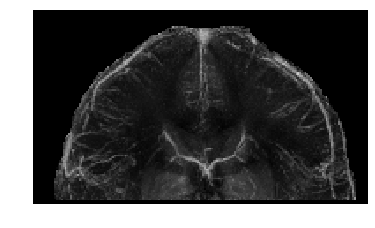

In [22]:
img =np.transpose(np.flip(np.flip(np.max(qsm[:,110:165,:],1),0),1))
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*img/np.abs(np.max(img))
imgc[:,:,1] = 255*img/np.abs(np.max(img))
imgc[:,:,2] = 255*img/np.abs(np.max(img))


cmap2 = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#00000000'),(0.5, '#008000FF'),
                                                                 (1, '#90ee90FF')])
img2 = np.transpose(np.flip(np.abs(np.max(interpolated_activations[:,110:165,:],1))**(1/2),1))

rgba_img = cmap2((img2)/(9)-1/9)
rgb_img = np.delete(rgba_img, 3, 2)
rgb_img = 255*rgb_img/np.abs(np.max(rgb_img))

plt.figure()
new_img = cv.addWeighted(imgc[10:,35:225].astype('uint8'), 0.8, rgb_img[10:,35:225].astype('uint8'), 0.7,0)
plt.imshow(new_img[:,:,:])
plt.axis('off')


## Figure 6

### Download the necessary data

In [23]:
data_ROI1 = np.load("dataset/Figure6/figure6_ROI1_dataset.npy")
data_ROI2 = np.load("dataset/Figure6/figure6_ROI2_dataset.npy")
qsm = np.load("dataset/Figure6/figure6_qsm.npy")
interpolated_activations = np.load("dataset/Figure6/figure6_interpolatedfmri.npy") # Activations interpolated to size of QSM matrix

In [24]:
spectra_baseline_ROI1 = data_ROI1[:,:,:,0]
spectra_task_ROI1 = data_ROI1[:,:,:,1]
spectra_baseline_ROI2 = data_ROI2[:,:,:,0]
spectra_task_ROI2 = data_ROI2[:,:,:,1]

In [25]:
# Colormap for percentage change maps
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#ffe4e182'),(0.3, '#FF000082'),
                                                                     (0.45, '#FF000000'), 
                                                                     (0.55, '#0000FF00'),
                                                                     (0.7,'#00bfff82'),
                                                                     (1, '#ADD8E682')])

### Plot Perfusion Source Maps and Percentage Change Maps

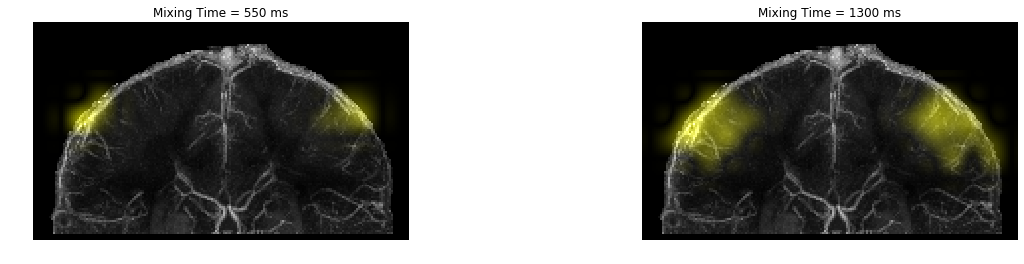

In [26]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = spectra_baseline_ROI1[:,2:,:]+spectra_task_ROI1[:,2:,:]
s2 = spectra_baseline_ROI2[:,2:,:]+spectra_task_ROI2[:,2:,:]

# Coronal projection of qsm venogram
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*np.abs(qsm)/np.abs(np.max(qsm))
imgc[:,:,1] = 255*np.abs(qsm)/np.abs(np.max(qsm))
imgc[:,:,2] = 255*np.abs(qsm)/np.abs(np.max(qsm))

# Resize and offsets
resize_factor = (10,10)
offset = (34,97)
offset2 = (34,14)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(20,4))
for i in range(3,9,5):
    # Resize, threshold and denoise spectra
    thresh = 0.25/np.exp(-(i*150+550)/3000) 
    resized1=libs.ProcessSpectra_comp(s1[:,:,i], s1[:,:,i], thresh, resize_factor)
    
    thresh = 0.25/np.exp(-(i*150+550)/3000)
    resized2=libs.ProcessSpectra_comp(s2[:,:,i], s2[:,:,i], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed=np.zeros(imgc.shape)
    overlayed = libs.OverlayColor(overlayed, resized1, offset, "yellow")
    overlayed = libs.OverlayColor(overlayed, resized2, offset2, "yellow")
    overlayed = 255*np.abs(overlayed)/np.max(np.abs(overlayed))

    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.6,0)
    axes[int((i-3)/5)].imshow(new_img[10:,35:225])
    title_subplt = "Mixing Time = " + str(100+150*i) + " ms"
    axes[int((i-3)/5)].set_title(title_subplt)
    axes[int((i-3)/5)].axis('off')

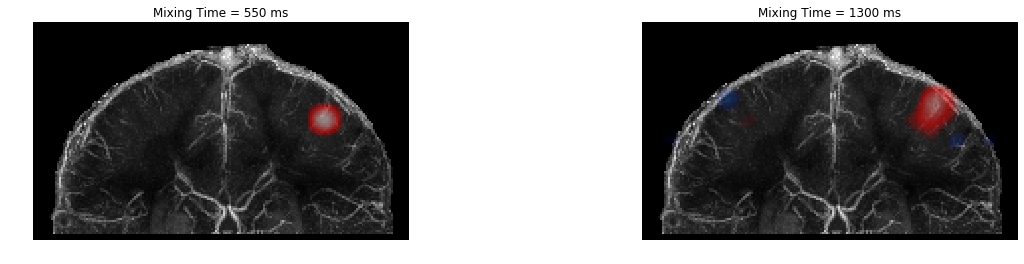

In [27]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = spectra_baseline_ROI1[:,2:,:]+spectra_task_ROI1[:,2:,:]
s2 = spectra_baseline_ROI2[:,2:,:]+spectra_task_ROI2[:,2:,:]

s1_diff = (spectra_baseline_ROI1[:,2:,:]-spectra_task_ROI1[:,2:,:])/spectra_baseline_ROI1[:,2:,:]
s2_diff = (spectra_baseline_ROI2[:,2:,:]-spectra_task_ROI2[:,2:,:])/spectra_baseline_ROI2[:,2:,:]

# Resize and offsets
resize_factor = (10,10)
offset = (34,97)
offset2 = (34,14)

# Plot at three mixing times
fig, axes = plt.subplots(1, 2, figsize=(20,4))
for i in range(3,9,5):
    # Resize, threshold and denoise spectra
    thresh = 0.25/np.exp(-(i*150+550)/3000) 
    resized1=libs.ProcessSpectra_comp(s1_diff[:,:,i], s1[:,:,i], thresh, resize_factor)
    
    thresh = 0.25/np.exp(-(i*150+550)/3000) 
    resized2=libs.ProcessSpectra_comp(s2_diff[:,:,i], s2[:,:,i], thresh, resize_factor)

    # Create overlay in corresponding color
    overlayed1 = libs.OverlayColor_cmap(resized1,imgc,cmap,offset,limit,1)
    overlayed2 = libs.OverlayColor_cmap(resized2,imgc,cmap,offset2,limit,1)

    axes[int((i-3)/5)].imshow(qsm[10:,35:225], cmap="gray")
    axes[int((i-3)/5)].imshow(overlayed1[10:,35:225,:])
    axes[int((i-3)/5)].imshow(overlayed2[10:,35:225,:])
    title_subplt = "Mixing Time = " + str(100+150*i) + " ms"
    axes[int((i-3)/5)].set_title(title_subplt)
    axes[int((i-3)/5)].axis('off')

### Plot Interpolated Activations

(-0.5, 189.5, 109.5, -0.5)

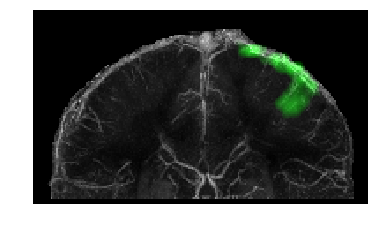

In [28]:
imgc = np.zeros((120,262,3))
imgc[:,:,0] = 255*qsm/np.abs(np.max(qsm))
imgc[:,:,1] = 255*qsm/np.abs(np.max(qsm))
imgc[:,:,2] = 255*qsm/np.abs(np.max(qsm))


cmap2 = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#00000000'),(0.5, '#008000FF'),
                                                                 (1, '#90ee90FF')])
img2 = np.transpose(np.flip(np.abs(np.max(interpolated_activations[:,75:110,:],1))**(1/2),1))

rgba_img = cmap2((img2)/(9)-1/9)
rgb_img = np.delete(rgba_img, 3, 2)
rgb_img = 255*rgb_img/np.abs(np.max(rgb_img))

plt.figure()
new_img = cv.addWeighted(imgc[10:,35:225].astype('uint8'), 0.8, rgb_img[10:,35:225].astype('uint8'), 0.7,0)
plt.imshow(new_img[:,:,:])
plt.axis('off')


## Figure 7

### Subject 1

#### Download the necessary data

In [29]:
data_r1 = np.load("dataset/Figure7/figure7_subject1r1_dataset.npy")
data_r2 = np.load("dataset/Figure7/figure7_subject1r2_dataset.npy")
qsm_r1 = np.load("dataset/Figure7/figure7_subject1r1_qsm.npy")
qsm_r2 = np.load("dataset/Figure7/figure7_subject1r2_qsm.npy")

In [30]:
# Colormap for percentage change maps
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#ffe4e182'),(0.3, '#FF000082'),
                                                                     (0.45, '#FF000000'), 
                                                                     (0.55, '#0000FF00'),
                                                                     (0.7,'#00bfff82'),
                                                                     (1, '#ADD8E682')])

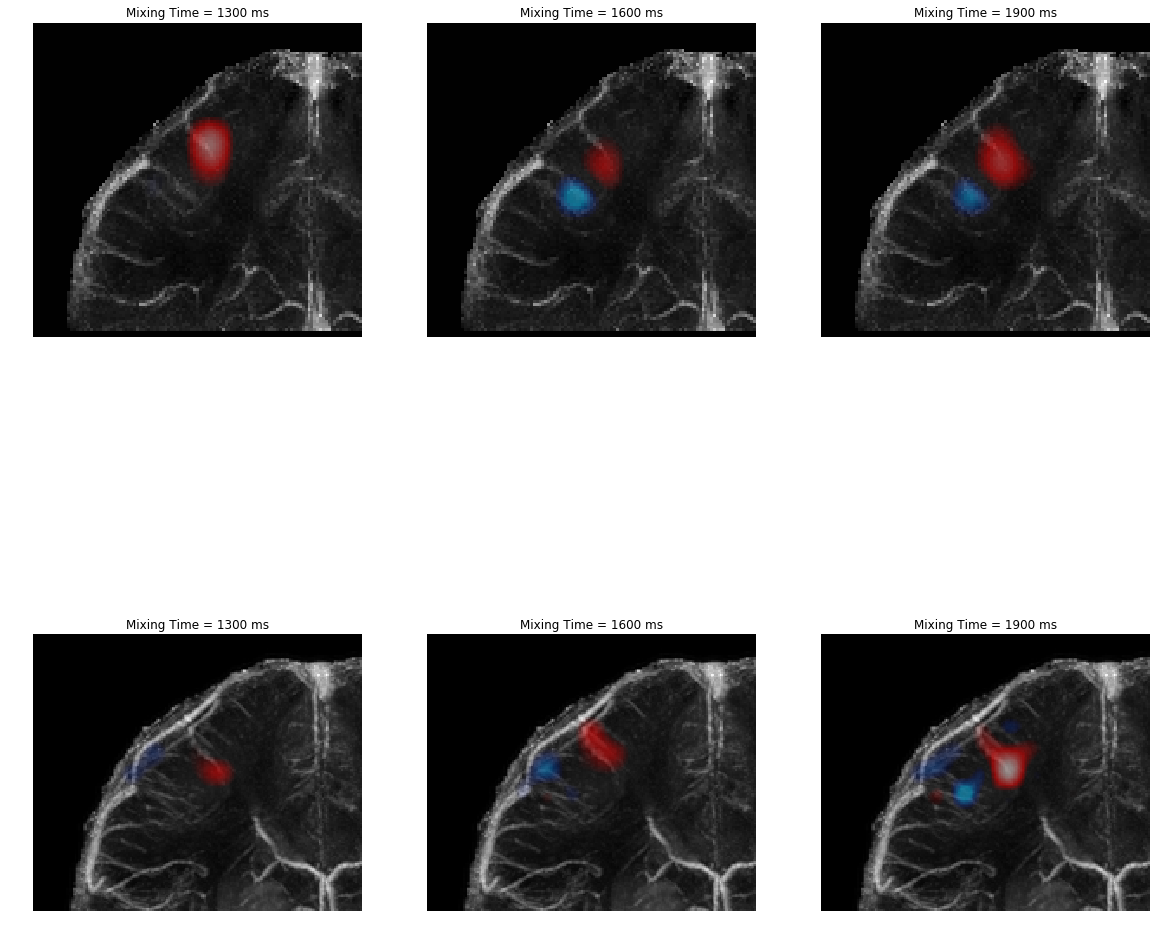

In [31]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = data_r1[:,2:,:,0]+data_r1[:,2:,:,1]
s2 = data_r2[:,:,:,0]+data_r2[:,:,:,1]

s1_diff = (data_r1[:,2:,:,0]-data_r1[:,2:,:,1])/data_r1[:,2:,:,0]
s2_diff = (data_r2[:,:,:,0]-data_r2[:,:,:,1])/data_r2[:,:,:,0]

imgc1 = np.zeros((120,262,3))
imgc2 = np.zeros((272,512,4))

# Resize and offsets
resize_factor = (10,10)
offset = (36,22)

resize_factor2 = (6/0.4688,6/0.5)
offset2 = (58,115)

# Plot at three mixing times
fig, axes = plt.subplots(2, 3, figsize=(20,20))
for i in range(3):
    # Resize, threshold and denoise spectra
    thresh = 0.33/np.exp(-(2*i*150+1300)/3000) # Second ROI is more noisy
    resized1=libs.ProcessSpectra_comp(s1_diff[:,:,i], s1[:,:,i], thresh, resize_factor)
    
    thresh = 0.35/np.exp(-(2*i*150+1300)/3000) 
    resized2=libs.ProcessSpectra_comp(s2_diff[:,:,i], s2[:,:,i], thresh, resize_factor2)

    # Create overlay in corresponding color
    overlayed1 = libs.OverlayColor_cmap(resized1,imgc1,cmap,offset,limit,1)
    overlayed2 = libs.OverlayColor_cmap(resized2,imgc2,cmap,offset2,limit,1)

    axes[0,i].imshow(qsm_r1[10:,35:150], cmap="gray")
    axes[0,i].imshow(overlayed1[10:,35:150,:])

    axes[1,i].imshow(qsm_r2[20:180,90:280], cmap="gray")
    axes[1,i].imshow(overlayed2[20:180,90:280])
    
    title_subplt = "Mixing Time = " + str(1300+150*2*i) + " ms"
    axes[0,i].set_title(title_subplt)
    axes[0,i].axis('off')
    axes[1,i].set_title(title_subplt)
    axes[1,i].axis('off')

### Subject 2

#### Download the necessary data

In [32]:
data_r1 = np.load("dataset/Figure7/figure7_subject2r1_dataset.npy")
data_r2 = np.load("dataset/Figure7/figure7_subject2r2_dataset.npy")
qsm_r1 = np.load("dataset/Figure7/figure7_subject2r1_qsm.npy")
qsm_r2 = np.load("dataset/Figure7/figure7_subject2r2_qsm.npy")

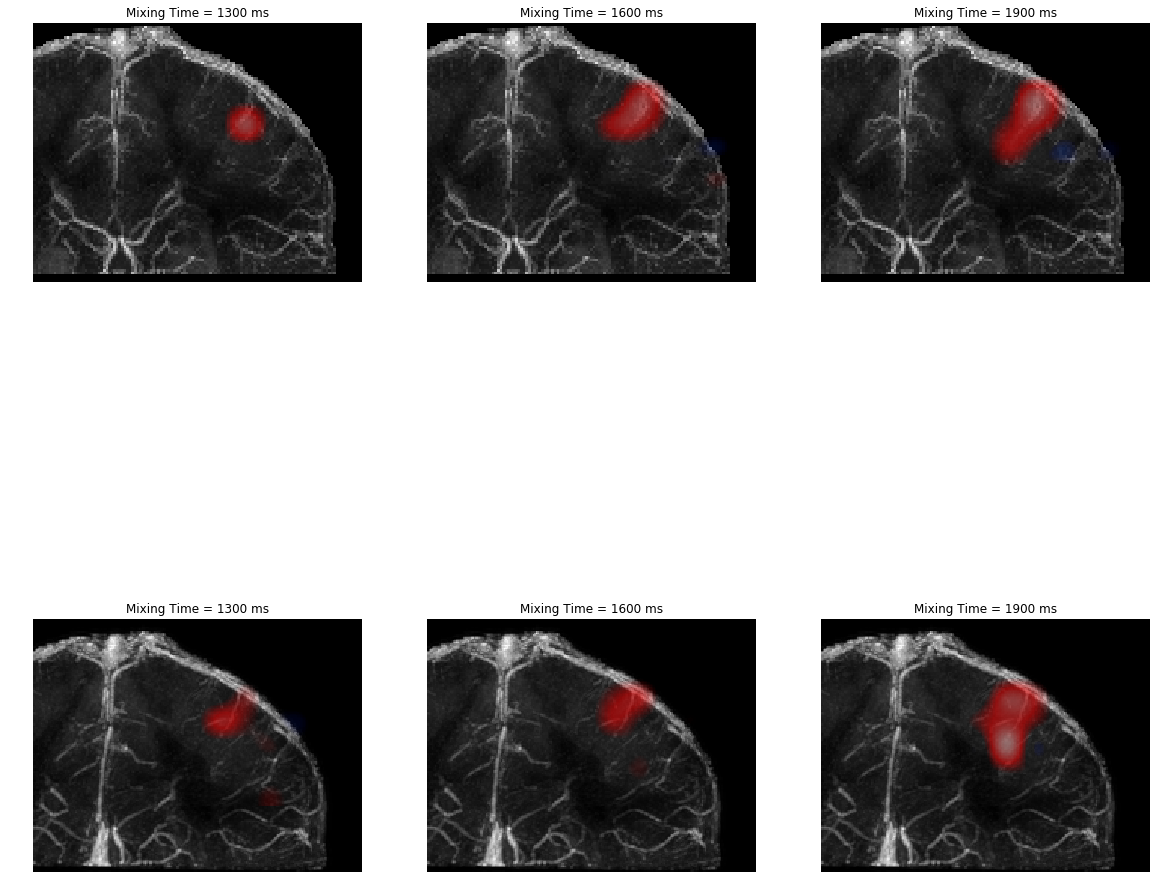

In [33]:
# Source perfusion maps (averaged baseline and task) of two selected veins
s1 = data_r1[:,2:,:,0]+data_r1[:,2:,:,1]
s2 = data_r2[:,4:,:,0]+data_r2[:,4:,:,1]

s1_diff = (data_r1[:,2:,:,0]-data_r1[:,2:,:,1])/data_r1[:,2:,:,0]
s2_diff = (data_r2[:,4:,:,0]-data_r2[:,4:,:,1])/data_r2[:,4:,:,0]

imgc1 = np.zeros((120,262,3))
imgc2 = np.zeros((272,512,4))

# Resize and offsets
resize_factor = (10,10)
offset = (34,97)

resize_factor2 = (8/0.4688,8/0.5)
offset2 = (60,190)

# Plot at three mixing times
fig, axes = plt.subplots(2, 3, figsize=(20,20))
for i in range(3):
    # Resize, threshold and denoise spectra
    thresh = 0.25/np.exp(-(2*(i+1)*150+550)/3000) 
    resized1=libs.ProcessSpectra_comp(s1_diff[:,:,i], s1[:,:,i], thresh, resize_factor)
    
    thresh = 0.23/np.exp(-(2*(i+1)*150+550)/3000) 
    resized2=libs.ProcessSpectra_comp(s2_diff[:,:,i], s2[:,:,i], thresh, resize_factor2)

    # Create overlay in corresponding color
    overlayed1 = libs.OverlayColor_cmap(resized1,imgc1,cmap,offset,limit,1)
    overlayed2 = libs.OverlayColor_cmap(resized2,imgc2,cmap,offset2,limit,1)

    axes[0,i].imshow(qsm_r1[20:,100:-35], cmap="gray")
    axes[0,i].imshow(overlayed1[20:,100:-35,:])

    axes[1,i].imshow(qsm_r2[32:200,211:429], cmap="gray")
    axes[1,i].imshow(overlayed2[32:200,211:429])
    
    title_subplt = "Mixing Time = " + str(1300+150*2*i) + " ms"
    axes[0,i].set_title(title_subplt)
    axes[0,i].axis('off')
    axes[1,i].set_title(title_subplt)
    axes[1,i].axis('off')

## Figure 8

### Identifying Regions with Significant Changes

#### Volunteer 1

In [34]:
data = np.load("dataset/Figure8/figure8_spectra_s1.npy")
img = np.load("dataset/Figure8/figure8_qsm_s1.npy")

In [35]:
spectrum_baseline_s1 = data[:,:,:,:,:,0]
spectrum_task_s1 = data[:,:,:,:,:,1]
t_statistic, p_value = libs.Calculate_Tstatistic(spectrum_baseline_s1, spectrum_task_s1)


In [36]:
# Colormap for percentage change maps
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0,'#ffe4e182'),(0.3, '#FF000082'),
                                                                     (0.45, '#FF000000'), 
                                                                     (0.55, '#0000FF00'),
                                                                     (0.7,'#00bfff82'),
                                                                     (1, '#ADD8E682')])

(-0.5, 189.5, 109.5, -0.5)

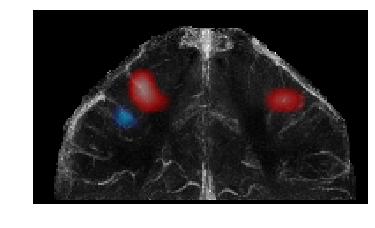

In [37]:
s1_1 = spectrum_baseline_s1[:,5:,3:12,25,13]+spectrum_task_s1[:,5:,3:12,25,13]
s2_1 = spectrum_baseline_s1[:,2:,3:12,27,27]+spectrum_task_s1[:,2:,3:12,27,27] 

imgc = np.zeros((120,262,3))

# Treshold and Resize
resize_factor = (10,10)

thresholding_sum = libs.get_thresholding_sum(s1_1,0.3)
thresholding_sum2 = libs.get_thresholding_sum(s2_1,0.3)

map_p1 = np.reshape(t_statistic[:,5:,25,13]*(p_value[:,5:,25,13]<0.05),(14,5))
map_p1[thresholding_sum<=2]=np.zeros(map_p1[thresholding_sum<=2].shape)
img1 = cv.resize(np.roll(np.flip(np.flip(np.transpose(map_p1)),1),0,0), dsize=(int(resize_factor[0]*map_p1.shape[0]), int(resize_factor[1]*map_p1.shape[1])), interpolation=cv.INTER_CUBIC)
rgba_img = cmap((img1+6)/12)

map_p2 = np.reshape(t_statistic[:,2:,27,27]*(p_value[:,2:,27,27]<0.05),(14,8))
map_p2[thresholding_sum2<=2]=np.zeros(map_p2[thresholding_sum2<=2].shape)
img2 = cv.resize(np.roll(np.flip(np.flip(np.transpose(map_p2)),1),0,0), dsize=(int(resize_factor[0]*map_p2.shape[0]), int(resize_factor[1]*map_p2.shape[1])), interpolation=cv.INTER_CUBIC)
rgba_img2 = cmap((img2+6)/12)

# Overlay
offset = (36,22)
overlayed = np.zeros((imgc.shape[0],imgc.shape[1],4))
overlayed[offset[0]:offset[0]+rgba_img.shape[0],offset[1]:offset[1]+rgba_img.shape[1],:]=rgba_img
overlayed = np.abs(overlayed)/np.max(np.abs(overlayed))

offset2 = (36,88)
overlayed2 = np.zeros((imgc.shape[0],imgc.shape[1],4))
overlayed2[offset2[0]:offset2[0]+rgba_img2.shape[0],offset2[1]:offset2[1]+rgba_img2.shape[1],:]=rgba_img2
overlayed2 = np.abs(overlayed2)/np.max(np.abs(overlayed2))

plt.figure()
plt.imshow(img[10:,35:225], cmap="gray")
plt.imshow(overlayed[10:,35:225,:])
plt.imshow(overlayed2[10:,35:225,:])
plt.axis('off')

In [38]:
data = np.load("dataset/Figure8/figure8_spectra_s2.npy")
img = np.load("dataset/Figure8/figure8_qsm_s2.npy")

In [39]:
spectrum_baseline_s2 = data[:,:,:,:,:,0]
spectrum_task_s2 = data[:,:,:,:,:,1]
t_statistic, p_value = libs.Calculate_Tstatistic(spectrum_baseline_s2, spectrum_task_s2)


(-0.5, 189.5, 109.5, -0.5)

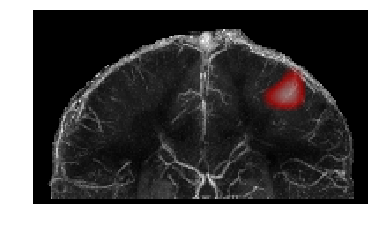

In [40]:
s1_2 = spectrum_baseline_s2[:,2:,3:12,28,24]+spectrum_task_s2[:,2:,3:12,28,24]
s2_2 = spectrum_baseline_s2[:,2:,3:12,11,22]+spectrum_task_s2[:,2:,3:12,11,22] 

imgc = np.zeros((120,262,3))

# Treshold and Resize
thresholding_sum = libs.get_thresholding_sum(s1_2,0.3)
thresholding_sum2 = libs.get_thresholding_sum(s2_2,0.3)

map_p1 = np.reshape(t_statistic[:,2:,28,24]*(p_value[:,2:,28,24]<0.05),(14,8))
map_p1[thresholding_sum<=2]=np.zeros(map_p1[thresholding_sum<=2].shape)
img1 = cv.resize(np.roll(np.flip(np.flip(np.transpose(map_p1)),1),0,0), dsize=(int(resize_factor[0]*map_p1.shape[0]), int(resize_factor[1]*map_p1.shape[1])), interpolation=cv.INTER_CUBIC)
rgba_img = cmap((img1+6)/12)

map_p2 = np.reshape(t_statistic[:,2:,11,22]*(p_value[:,2:,11,22]<0.05),(14,8))
map_p2[thresholding_sum2<=2]=np.zeros(map_p2[thresholding_sum2<=2].shape)
img2 = cv.resize(np.roll(np.flip(np.flip(np.transpose(map_p2)),1),0,0), dsize=(int(resize_factor[0]*map_p2.shape[0]), int(resize_factor[1]*map_p2.shape[1])), interpolation=cv.INTER_CUBIC)
rgba_img2 = cmap((img2+6)/12)

# Overlay
offset = (34,97)
overlayed = np.zeros((imgc.shape[0],imgc.shape[1],4))
overlayed[offset[0]:offset[0]+rgba_img.shape[0],offset[1]:offset[1]+rgba_img.shape[1],:]=rgba_img
overlayed = np.abs(overlayed)/np.max(np.abs(overlayed))

offset2 = (34,14)
overlayed2 = np.zeros((imgc.shape[0],imgc.shape[1],4))
overlayed2[offset2[0]:offset2[0]+rgba_img2.shape[0],offset2[1]:offset2[1]+rgba_img2.shape[1],:]=rgba_img2
overlayed2 = np.abs(overlayed2)/np.max(np.abs(overlayed2))

plt.figure()
plt.imshow(img[10:,35:225], cmap="gray")
plt.imshow(overlayed[10:,35:225,:])
plt.imshow(overlayed2[10:,35:225,:])
plt.axis('off')

### Plot Signal Intensity in ROIs with Significant Changes

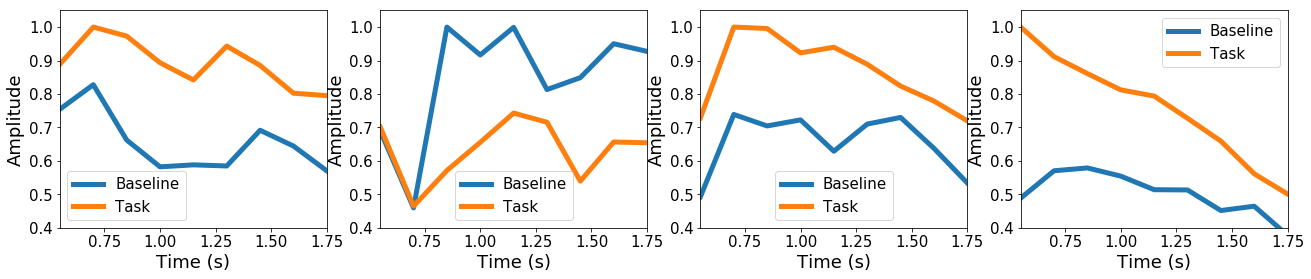

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(22,4))

# Reshape the data
spectrum_baseline_s1r = np.transpose(np.flip(spectrum_baseline_s1[:,:,3:12,:,:],1),(1,0,2,3,4))
spectrum_task_s1r = np.transpose(np.flip(spectrum_task_s1[:,:,3:12,:,:],1),(1,0,2,3,4))
spectrum_baseline_s2r = np.transpose(np.flip(spectrum_baseline_s2[:,:,3:12,:,:],1),(1,0,2,3,4))
spectrum_task_s2r = np.transpose(np.flip(spectrum_task_s2[:,:,3:12,:,:],1),(1,0,2,3,4))

time = np.linspace(0,spectrum_baseline_s1r.shape[2]-1,spectrum_baseline_s1r.shape[2])*0.15+0.55

# Select corresponding ROIs

for i in range(4):
    if i==0:
        baseline = spectrum_baseline_s1r[1,7,:,25,13]+spectrum_baseline_s1r[2,7,:,25,13]
        task = spectrum_task_s1r[1,7,:,25,13]+spectrum_task_s1r[2,7,:,25,13]
    elif i==1:
        baseline = spectrum_baseline_s1r[3,5,:,25,13]+spectrum_baseline_s1r[3,6,:,25,13]
        task = spectrum_task_s1r[3,5,:,25,13]+spectrum_task_s1r[3,6,:,25,13]
    elif i==2:
        baseline = spectrum_baseline_s1r[2,8,:,27,27]+spectrum_baseline_s1r[2,9,:,27,27]
        task = spectrum_task_s1r[2,8,:,27,27]+spectrum_task_s1r[2,9,:,27,27]
    else:
        baseline = spectrum_baseline_s2r[2,8,:,28,24]+spectrum_baseline_s2r[2,7,:,28,24]
        task = spectrum_task_s2r[2,8,:,28,24]+spectrum_task_s2r[2,7,:,28,24]
    
# Normalize
    
    maxval = np.maximum(np.max(baseline),np.max(task))
    baseline = baseline/maxval
    task = task/maxval
    
# Plot
    
    axes[i].plot(time,baseline,label='Baseline',linewidth=5)
    axes[i].plot(time,task,label='Task',linewidth=5)
    axes[i].set_xlim([0.55, 1.75])
    axes[i].set_ylim([0.4, 1.05])
    axes[i].set_xlabel('Time (s)', fontsize=18)
    axes[i].set_ylabel('Amplitude', fontsize=18)
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].legend(fontsize=15)
    

### Plot Percent Modulation in Spiral-BOLD Across Acquisition

In [42]:
modulation_roi1 = np.load("dataset/Figure8/figure8_fmrimdulation_r1.npy")
modulation_roi2 = np.load("dataset/Figure8/figure8_fmrimdulation_r2.npy")
modulation_roi3 = np.load("dataset/Figure8/figure8_fmrimdulation_r3.npy")

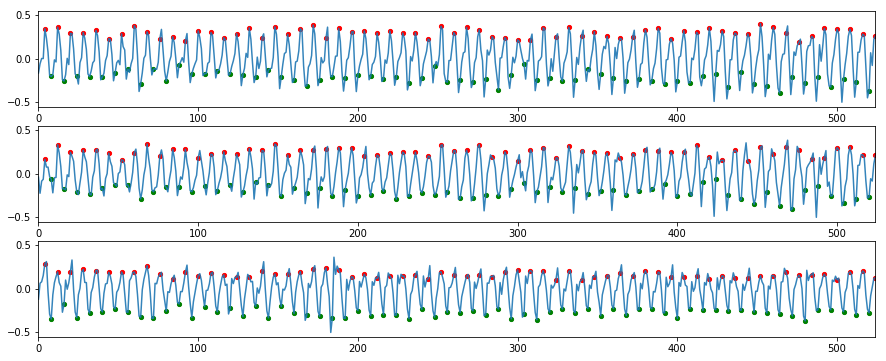

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(15,6))
axes[0].plot(modulation_roi1,alpha=0.9)
axes[0].scatter(np.arange(4,len(modulation_roi1),8),modulation_roi1[4::8],color='r',marker='.',s=70)
axes[0].set_xlim(0,524)
axes[0].set_ylim(-0.55,0.55)
axes[0].scatter(np.arange(8,len(modulation_roi1),8),modulation_roi1[8::8],color='g',marker='.',s=70)

axes[1].plot(modulation_roi2,alpha=0.9)
axes[1].scatter(np.arange(4,len(modulation_roi2),8),modulation_roi2[4::8],color='r',marker='.',s=70)
axes[1].set_xlim(0,524)
axes[1].set_ylim(-0.55,0.55)
axes[1].scatter(np.arange(8,len(modulation_roi2),8),modulation_roi2[8::8],color='g',marker='.',s=70)

axes[2].plot(modulation_roi3,alpha=0.9)
axes[2].scatter(np.arange(4,len(modulation_roi3),8),modulation_roi3[4::8],color='r',marker='.',s=70)
axes[2].set_xlim(0,524)
axes[2].set_ylim(-0.55,0.55)
axes[2].scatter(np.arange(8,len(modulation_roi3),8),modulation_roi3[8::8],color='g',marker='.',s=70)

## Figure 9

#### Section 1

In [44]:
data_s1 = np.load("dataset/Figure9/figure9_spectra_s1.npy")
qsm_s1 = np.load("dataset/Figure9/figure9_qsm_s1.npy")

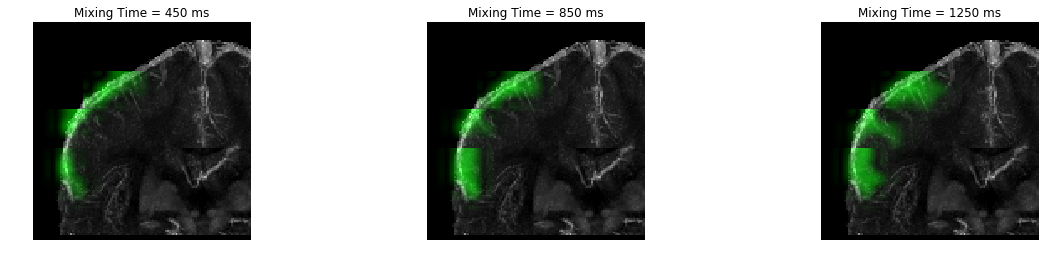

In [45]:
# Coronal projection of qsm venogram
imgc = np.zeros((140,224,3))
imgc[:,:,0] = 255*np.abs(qsm_s1)/np.abs(np.max(qsm_s1))
imgc[:,:,1] = 255*np.abs(qsm_s1)/np.abs(np.max(qsm_s1))
imgc[:,:,2] = 255*np.abs(qsm_s1)/np.abs(np.max(qsm_s1))


# Plot at three mixing times
fig, axes = plt.subplots(1, 3, figsize=(20,4))
for i in range(3):
    overlayed = data_s1[:,:,:,i]
    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.6,0)
    axes[i].imshow(new_img[10:,10:140])
    title_subplt = "Mixing Time = " + str(450+400*i) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')

#### Section 2

In [46]:
data_s2 = np.load("dataset/Figure9/figure9_spectra_s2.npy")
qsm_s2 = np.load("dataset/Figure9/figure9_qsm_s2.npy")

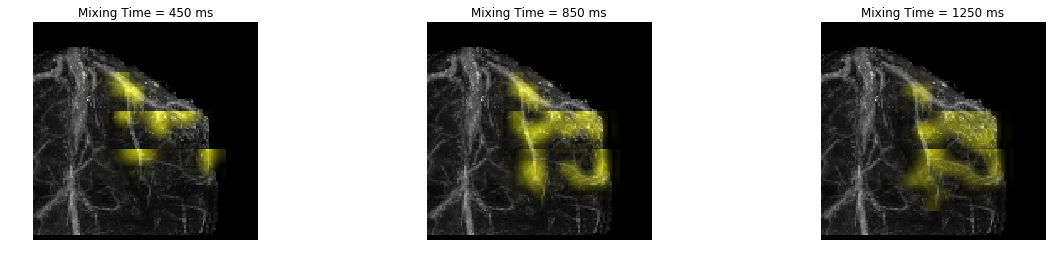

In [47]:
# Coronal projection of qsm venogram
imgc = np.zeros((140,224,3))
imgc[:,:,0] = 255*np.abs(qsm_s2)/np.abs(np.max(qsm_s2))
imgc[:,:,1] = 255*np.abs(qsm_s2)/np.abs(np.max(qsm_s2))
imgc[:,:,2] = 255*np.abs(qsm_s2)/np.abs(np.max(qsm_s2))


# Plot at three mixing times
fig, axes = plt.subplots(1, 3, figsize=(20,4))
for i in range(3):
    overlayed = data_s2[:,:,:,i]
    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.6,0)
    axes[i].imshow(new_img[10:,90:225])
    title_subplt = "Mixing Time = " + str(450+400*i) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')

#### Section 3

In [48]:
data_s3 = np.load("dataset/Figure9/figure9_spectra_s3.npy")
qsm_s3 = np.load("dataset/Figure9/figure9_qsm_s3.npy")

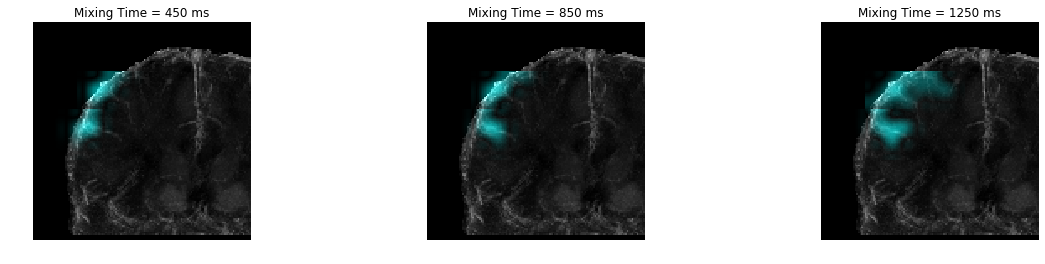

In [49]:
# Coronal projection of qsm venogram
imgc = np.zeros((140,224,3))
imgc[:,:,0] = 255*np.abs(qsm_s3)/np.abs(np.max(qsm_s3))
imgc[:,:,1] = 255*np.abs(qsm_s3)/np.abs(np.max(qsm_s3))
imgc[:,:,2] = 255*np.abs(qsm_s3)/np.abs(np.max(qsm_s3))


# Plot at three mixing times
fig, axes = plt.subplots(1, 3, figsize=(20,4))
for i in range(3):
    overlayed = data_s3[:,:,:,i]
    new_img = cv.addWeighted(imgc.astype('uint8'), 0.85, overlayed.astype('uint8'), 0.6,0)
    axes[i].imshow(new_img[10:,10:140])
    title_subplt = "Mixing Time = " + str(450+400*i) + " ms"
    axes[i].set_title(title_subplt)
    axes[i].axis('off')